## Gender Recognition by Voice Project
In this project, we will classify a person's gender by his/her various aspects of voice using different classification methods like logistic regression, k-nearest neighbors, Naive Bayes. These methods will be completely implemented from sratch using pure Python and related mathematical concepts. For each method, we'll compare it with its built-in version in sklearn library to see if there are any differences in results. In addition, other methods like SVM, Decision Tree, Random Forest are also used from sklearn to compare the accuracy among methods. Data were downloaded from Kaggle

## Imports


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Read and explore data

In [2]:
df = pd.read_csv("voice.csv")

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


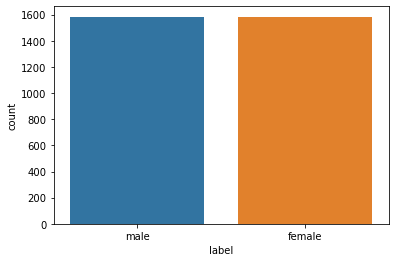

In [5]:
sns.countplot(x='label', data=df)

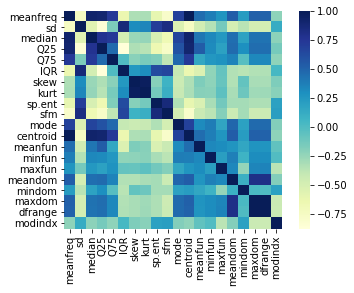

In [6]:
sns.heatmap(df.drop('label', axis=1).corr(), square = True, cmap="YlGnBu", linecolor='black')

C:\Users\phant\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


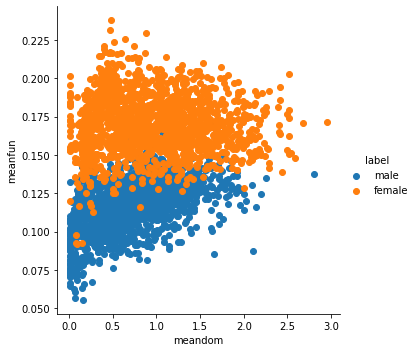

In [7]:
sns.FacetGrid(df, hue='label', size=5).map(plt.scatter, 'meandom','meanfun').add_legend()

## Standardize data
Data need to be standardized to a smaller scale to calculate more easily.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(df.drop('label',axis=1))

StandardScaler()

In [11]:
scaled_features = scaler.transform(df.drop('label',axis=1))

In [12]:
# feat all columns except the "Type" one
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611669,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046


## Split the data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# encoding label column
df['label'] = df['label'].replace(['male', 'female'], [0,1])

In [15]:
X = df_feat
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# df to compare results among methods
comparison = pd.DataFrame(columns=['Name', 'accuracy'])

## Use Logistic Regression from sklearn library

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
# Train the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [18]:
# Get the prediction for X_test
y_logSK_pred = logmodel.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [20]:
print(classification_report(y_test,y_logSK_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       547
           1       0.97      0.97      0.97       499

    accuracy                           0.97      1046
   macro avg       0.97      0.97      0.97      1046
weighted avg       0.97      0.97      0.97      1046



In [21]:
print(confusion_matrix(y_test,y_logSK_pred))

[[534  13]
 [ 17 482]]


## Implementing Logistic Regression from scratch

In [22]:
# Create a logistic regression class to import from (LogisticRegressionFromScratch.py)

class LogisticRegressionFromScratch:
    def __init__(self, X, y):
        # Add a column of zeros for X
        zeros_col = np.ones((X.shape[0],1))
        X = np.append(zeros_col,X,axis=1)
        # Initialize variables
        self.X = X
        self.y = y
        self.m = X.shape[0]
        self.n = X.shape[1]
        # Randomize values for theta
        self.theta = np.random.randn(X.shape[1],1)
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def costFunction(self):
        # Calculate predicted h then cost value
        h = self.sigmoid(np.matmul(self.X, self.theta))
        self.J = (1/self.m)*(-self.y.T.dot(np.log(h)) - (1 - self.y).T.dot(np.log(1 - h)))
        return self.J
    
    def gradientDescent(self, alpha, num_iters):
        # Keep records of cost values and thetas
        self.J_history = []
        self.theta_history = []
        for i in range (num_iters):
            # Calculate new value for h then update J_history
            h = self.sigmoid(np.matmul(self.X, self.theta))
            self.J_history.append(self.costFunction())
            self.theta_history.append(self.theta)
            self.theta = self.theta - (alpha/self.m)*(self.X.T.dot(h-self.y))
        return self.J_history, self.theta_history, self.theta
    
    def predict(self, X_test, y_test):
        # Add a column of zeros for X_test
        zeros_col = np.ones((X_test.shape[0],1))
        X_test = np.append(zeros_col, X_test, axis = 1)
        # Calculate final predicted y values after using gradient descent to update theta
        cal_sigmoid = self.sigmoid(np.matmul(X_test, self.theta))
        self.y_pred = []
        for value in cal_sigmoid:
            if value >= 0.5:
                self.y_pred.append(1)
            else:
                self.y_pred.append(0)  
        return self.y_pred  

In [23]:
from LogisticRegressionFromScratch import LogisticRegressionFromScratch

In [24]:
lmFromScratch = LogisticRegressionFromScratch(X_train, y_train.to_numpy().reshape(y_train.shape[0],1))
# PREDICT USING GRADIENT DESCENT
# set up number of iterations and learning rate
num_iters = 15000
alpha = 0.01 
# update theta value and get predicted y
j_hist, theta_hist, theta = lmFromScratch.gradientDescent(alpha, num_iters)
y_logScratch_pred = lmFromScratch.predict(X_test, y_test.to_numpy().reshape(y_test.shape[0],1))

In [25]:
print(confusion_matrix(y_test,y_logScratch_pred))

[[535  12]
 [ 19 480]]


In [26]:
print(classification_report(y_test,y_logScratch_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       547
           1       0.98      0.96      0.97       499

    accuracy                           0.97      1046
   macro avg       0.97      0.97      0.97      1046
weighted avg       0.97      0.97      0.97      1046



In [27]:
new_data = {'Name': 'Logistic Regression', 'accuracy': accuracy_score(y_test,y_logScratch_pred)}
comparison = comparison.append(new_data, ignore_index=True)

## Use KNN from sklearn library

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# start with k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_knnSK_pred = knn.predict(X_test)

In [30]:
print(confusion_matrix(y_test, y_knnSK_pred))

[[532  15]
 [ 11 488]]


In [31]:
print(classification_report(y_test,y_knnSK_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       547
           1       0.97      0.98      0.97       499

    accuracy                           0.98      1046
   macro avg       0.97      0.98      0.98      1046
weighted avg       0.98      0.98      0.98      1046



In [32]:
# plot out the error vs k-value graph to choose the best k value
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

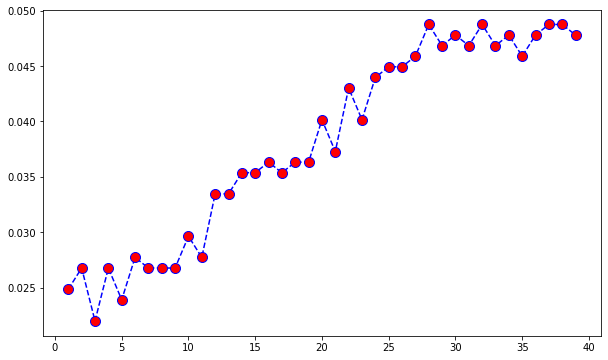

In [33]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', markerfacecolor = 'red', markersize = 10)

In [34]:
# From above plot, k = 3 is the value gives us the lowest error, so we'll retrain knn model with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [35]:
print(confusion_matrix(y_test, y_knnSK_pred))

[[532  15]
 [ 11 488]]


In [36]:
print(classification_report(y_test,y_knnSK_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       547
           1       0.97      0.98      0.97       499

    accuracy                           0.98      1046
   macro avg       0.97      0.98      0.98      1046
weighted avg       0.98      0.98      0.98      1046



There are no difference in results when changing k to 3 because the errors when k = 1 and k = 3 is too small and inevitable.

## Implementing KNN from scratch

In [37]:
import numpy as np

class KNNFromScratch():
    def __init__(self, k):
        self.k = k
    
    # get training data
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X_test):
        dist = self.compute_dist(X_test) 
        return self.predict_label(dist)
    
    # compute distance between each sample in X_test and X_train
    def compute_dist(self, X_test):
        test_size = X_test.shape[0]
        train_size = self.X_train.shape[0]
        dist = np.zeros((test_size, train_size))
        for i in range(test_size):
            for j in range(train_size):
                dist[i, j] = np.sqrt(np.sum((X_test[i,:] - self.X_train[j,:])**2))
        return dist
    
    # return predicted label with given distance of X_test
    def predict_label(self, dist):
        test_size = dist.shape[0]
        y_pred = np.zeros(test_size)
        for i in range(test_size):
            y_indices = np.argsort(dist[i, :])
            k_closest = self.y_train[y_indices[: self.k]].astype(int)
            y_pred[i] = np.argmax(np.bincount(k_closest))
        return y_pred

In [38]:
from KNNFromScratch import KNNFromScratch

In [39]:
# train with k=3
knnFromScratch = KNNFromScratch(3)
knnFromScratch.train(X_train.to_numpy(), y_train.to_numpy())
y_knnScratch_pred = knnFromScratch.predict(X_test.to_numpy())

The result is slightly better than using sklearn library

In [40]:
print(confusion_matrix(y_test, y_knnScratch_pred))

[[536  11]
 [ 12 487]]


In [41]:
print(classification_report(y_test,y_knnScratch_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       547
           1       0.98      0.98      0.98       499

    accuracy                           0.98      1046
   macro avg       0.98      0.98      0.98      1046
weighted avg       0.98      0.98      0.98      1046



In [42]:
new_data = {'Name': 'KNN', 'accuracy': accuracy_score(y_test,y_knnScratch_pred)}
comparison = comparison.append(new_data, ignore_index=True)

## Use Naive Bayes from sklearn library

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)
y_nbSK_pred = naiveBayes.predict(X_test)

In [45]:
print(confusion_matrix(y_test, y_nbSK_pred))

[[489  58]
 [ 51 448]]


In [46]:
print(classification_report(y_test,y_nbSK_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       547
           1       0.89      0.90      0.89       499

    accuracy                           0.90      1046
   macro avg       0.90      0.90      0.90      1046
weighted avg       0.90      0.90      0.90      1046



## Implementing Naive Bayes from scratch

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

class NaiveBayesFromScratch():
    def __init__(self, X, y):
        self.num_examples, self.num_features = X.shape
        self.num_classes = len(np.unique(y))

    def fit(self, X, y):
        self.classes_mean = {}
        self.classes_variance = {}
        self.classes_prior = {}
        
        # calculate the mean, variance, prior of each class
        for c in range(self.num_classes):
            X_c = X[y == c]

            self.classes_mean[str(c)] = np.mean(X_c, axis=0)
            self.classes_variance[str(c)] = np.var(X_c, axis=0)
            self.classes_prior[str(c)] = X_c.shape[0] / X.shape[0]
    
    # predict using Naive Bayes Gaussian formula
    def predict(self, X):
        probs = np.zeros((X.shape[0], self.num_classes))
        for c in range(self.num_classes):
            prior = self.classes_prior[str(c)]
            probs_c = multivariate_normal.pdf(X, mean=self.classes_mean[str(c)], cov=self.classes_variance[str(c)])
            probs[:,c] = probs_c*prior
        return np.argmax(probs, 1)
    

In [48]:
from NaiveBayesFromScratch import NaiveBayesFromScratch

In [49]:
naiveBayesFromScratch = NaiveBayesFromScratch(X_train.to_numpy(), y_train.to_numpy())
naiveBayesFromScratch.fit(X_train.to_numpy(), y_train.to_numpy())
y_nbScratch_pred = naiveBayesFromScratch.predict(X_test.to_numpy())

In [50]:
print(confusion_matrix(y_test, y_nbScratch_pred))

[[489  58]
 [ 51 448]]


In [51]:
print(classification_report(y_test,y_nbScratch_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       547
           1       0.89      0.90      0.89       499

    accuracy                           0.90      1046
   macro avg       0.90      0.90      0.90      1046
weighted avg       0.90      0.90      0.90      1046



In [52]:
new_data = {'Name': 'Naive Bayes', 'accuracy': accuracy_score(y_test,y_nbScratch_pred)}
comparison = comparison.append(new_data, ignore_index=True)

## Use SVM from sklearn

In [53]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

In [54]:
print(confusion_matrix(y_test,svm_pred))

[[535  12]
 [  8 491]]


In [55]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       547
           1       0.98      0.98      0.98       499

    accuracy                           0.98      1046
   macro avg       0.98      0.98      0.98      1046
weighted avg       0.98      0.98      0.98      1046



In [56]:
new_data = {'Name': 'SVM', 'accuracy': accuracy_score(y_test,svm_pred)}
comparison = comparison.append(new_data, ignore_index=True)

In [57]:
# Grid Search
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.694, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.675, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.658, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.665, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.682, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.967, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.965, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.962, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.950, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.979, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.972, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.972, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.967, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.983, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.941, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.939, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.950, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    7.9s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [60]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [61]:
grid_pred = grid.predict(X_test)

The result is not better than the default one

In [62]:
print(confusion_matrix(y_test,grid_pred))

[[533  14]
 [  9 490]]


In [63]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       547
           1       0.97      0.98      0.98       499

    accuracy                           0.98      1046
   macro avg       0.98      0.98      0.98      1046
weighted avg       0.98      0.98      0.98      1046



## Use Decision Tree from sklearn

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
# train the model and get predicted results for test set
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtre_pred = dtree.predict(X_test)

In [66]:
print(classification_report(y_test,dtre_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       547
           1       0.95      0.97      0.96       499

    accuracy                           0.96      1046
   macro avg       0.96      0.96      0.96      1046
weighted avg       0.96      0.96      0.96      1046



In [67]:
print(confusion_matrix(y_test,dtre_pred))

[[524  23]
 [ 15 484]]


In [68]:
new_data = {'Name': 'Decision Tree', 'accuracy': accuracy_score(y_test,dtre_pred)}
comparison = comparison.append(new_data, ignore_index=True)

## Use Random Forest from sklearn

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
# train the model and get predicted results for test set
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [71]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       547
           1       0.97      0.98      0.98       499

    accuracy                           0.98      1046
   macro avg       0.98      0.98      0.98      1046
weighted avg       0.98      0.98      0.98      1046



In [72]:
print(confusion_matrix(y_test,rfc_pred))

[[532  15]
 [  8 491]]


In [73]:
new_data = {'Name': 'Random Forest', 'accuracy': accuracy_score(y_test,rfc_pred)}
comparison = comparison.append(new_data, ignore_index=True)

## Results comparison among methods

In [74]:
comparison

,Name,accuracy
0,Logistic Regression,0.970363
1,KNN,0.978011
2,Naive Bayes,0.895793
3,SVM,0.980880
4,Decision Tree,0.963671
5,Random Forest,0.978011


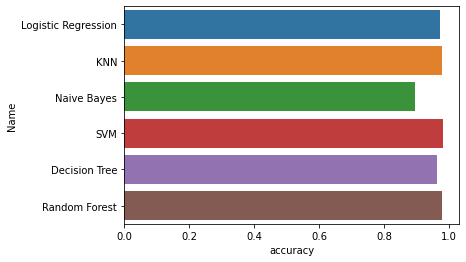

In [75]:
sns.barplot(data=comparison, x='accuracy', y='Name')

## Conclusion

In conclusion, results of methods implemented from scratch are quite similar to those from sklearn library. Among classification methods, SVM is the best method with highest accuracy.